# Battery EIS dataset exploration

## Setup

In [1]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns;

In [3]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path,copy_model_to_google_drive
from eb_ml_battery_lib import load_soc_dataset,generate_image_files_from_eis
from eb_ml_utils import save_model_weights,build_data_loader,build_and_train_learner,score_model

In [4]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("../")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']


NOT running on COLAB


In [5]:
# Data acquition file to load from dateset folder
battery_list=["02_1","02_2","02_3","02_4","02_5","02_6","02_7","02_8","02_9"]

In [6]:
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\.

In [7]:
dataset.reset_index(drop=True,inplace=True)

In [8]:
row_number=dataset.shape[0]
dataset.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j
mean,0.098181-0.005001j,0.096507-0.003977j,0.095383-0.002832j,0.094782-0.002262j,0.093604-0.002295j,0.092843-0.002748j,0.091782-0.003379j,0.089452-0.004758j,0.086883-0.005741j,0.083907-0.006249j,0.079837-0.006132j,0.077002-0.005586j,0.074556-0.004759j,0.072027-0.003429j
std,0.016788+0.000000j,0.016616+0.000000j,0.016471+0.000000j,0.016356+0.000000j,0.016145+0.000000j,0.015928+0.000000j,0.015630+0.000000j,0.015145+0.000000j,0.014793+0.000000j,0.014490+0.000000j,0.014200+0.000000j,0.013991+0.000000j,0.013824+0.000000j,0.013610+0.000000j
min,0.064123-0.003129j,0.062851-0.002548j,0.062117-0.001792j,0.061998-0.001300j,0.061108-0.001587j,0.060769-0.001721j,0.060420-0.002065j,0.058980-0.002957j,0.057408-0.003769j,0.055408-0.004586j,0.052218-0.004757j,0.049936-0.004607j,0.047889-0.003867j,0.045732-0.002743j
25%,0.100935-0.004008j,0.099597-0.003072j,0.098430-0.002521j,0.098001-0.002401j,0.096939-0.002460j,0.096043-0.002506j,0.095153-0.002672j,0.093414-0.004004j,0.091298-0.004991j,0.088694-0.005761j,0.084818-0.005903j,0.082131-0.005352j,0.079704-0.004750j,0.077043-0.003789j
50%,0.104772-0.004021j,0.103292-0.003562j,0.101802-0.002296j,0.101349-0.002331j,0.100260-0.001643j,0.099655-0.002537j,0.098623-0.002880j,0.096731-0.004267j,0.093906-0.005391j,0.090972-0.006164j,0.086812-0.006407j,0.083904-0.005704j,0.081343-0.004846j,0.078727-0.003362j
75%,0.107218-0.006529j,0.105056-0.005217j,0.103962-0.002479j,0.103384-0.002580j,0.102149-0.002398j,0.101465-0.002771j,0.100434-0.003055j,0.098016-0.004448j,0.095395-0.005944j,0.092365-0.005964j,0.088041-0.006818j,0.085003-0.005862j,0.082404-0.005024j,0.079706-0.003529j
max,0.122604-0.007702j,0.119806-0.006500j,0.117896-0.005398j,0.116326-0.005284j,0.113123-0.006122j,0.111734-0.004291j,0.109821-0.006280j,0.105429-0.008814j,0.100346-0.010365j,0.095419-0.007102j,0.091249-0.006766j,0.088219-0.006022j,0.085772-0.005352j,0.082867-0.003711j


Analizzo separatamente Parte Real e Parte Immaginaria

In [9]:
df=dataset[feature_col_names]
df_real= df.apply(lambda col: col.apply(lambda val: np.real(val)))
df_img= df.apply(lambda col: col.apply(lambda val: np.imag(val)))

df_real['SOC']= dataset['SOC']
df_real['SOC_category'] = df_real.SOC.astype('category')
df_img['SOC']= dataset['SOC']
df_img['SOC_category'] = df_real.SOC.astype('category')


In [10]:
df_img.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.005001,-0.003977,-0.002832,-0.002262,-0.002295,-0.002748,-0.003379,-0.004758,-0.005741,-0.006249,-0.006132,-0.005586,-0.004759,-0.003429
std,0.001116,0.000993,0.000764,0.000745,0.000902,0.001106,0.001230,0.001219,0.001102,0.001002,0.000743,0.000612,0.000499,0.000361
min,-0.007702,-0.006500,-0.005398,-0.005284,-0.006122,-0.007341,-0.007834,-0.008814,-0.010365,-0.010190,-0.009053,-0.007650,-0.006336,-0.004275
25%,-0.005991,-0.004996,-0.003422,-0.002657,-0.002521,-0.002893,-0.003676,-0.005331,-0.006308,-0.006719,-0.006577,-0.005923,-0.005049,-0.003658
50%,-0.004913,-0.003771,-0.002722,-0.002144,-0.002289,-0.002617,-0.003137,-0.004506,-0.005578,-0.006101,-0.006100,-0.005636,-0.004784,-0.003501
75%,-0.004074,-0.003162,-0.002174,-0.001707,-0.001723,-0.002103,-0.002699,-0.004031,-0.005009,-0.005643,-0.005634,-0.005215,-0.004530,-0.003263
max,-0.002348,-0.001948,-0.001598,-0.001184,-0.001010,-0.001248,-0.001729,-0.002914,-0.003769,-0.004541,-0.004732,-0.004319,-0.003678,-0.002580


In [11]:
df_real.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.098181,0.096507,0.095383,0.094782,0.093604,0.092843,0.091782,0.089452,0.086883,0.083907,0.079837,0.077002,0.074556,0.072027
std,0.016751,0.016586,0.016453,0.016339,0.016119,0.015890,0.015581,0.015096,0.014752,0.014455,0.014181,0.013977,0.013815,0.013605
min,0.064123,0.062851,0.062117,0.061998,0.061108,0.060769,0.060420,0.058980,0.057408,0.055408,0.052218,0.049936,0.047889,0.045732
25%,0.100935,0.099597,0.098430,0.098001,0.096939,0.096043,0.095153,0.093414,0.091298,0.088694,0.084818,0.082131,0.079704,0.077043
50%,0.104772,0.103292,0.101802,0.101349,0.100260,0.099655,0.098623,0.096731,0.093906,0.090972,0.086812,0.083904,0.081343,0.078727
75%,0.107218,0.105056,0.103962,0.103384,0.102149,0.101465,0.100434,0.098016,0.095395,0.092365,0.088041,0.085003,0.082404,0.079706
max,0.122604,0.119806,0.117896,0.116326,0.113123,0.111734,0.109821,0.105429,0.100346,0.095419,0.091249,0.088219,0.085772,0.082867


In [12]:
df_real.columns[:-2]

Index(['Z_f0', 'Z_f1', 'Z_f2', 'Z_f3', 'Z_f4', 'Z_f5', 'Z_f6', 'Z_f7', 'Z_f8',
       'Z_f9', 'Z_f10', 'Z_f11', 'Z_f12', 'Z_f13'],
      dtype='object')

In [13]:
def show_pair_plot(data,var_columns,category_columns,title):
    sns.pairplot(data,vars=var_columns,hue=category_columns,kind='hist')
    plt.show()

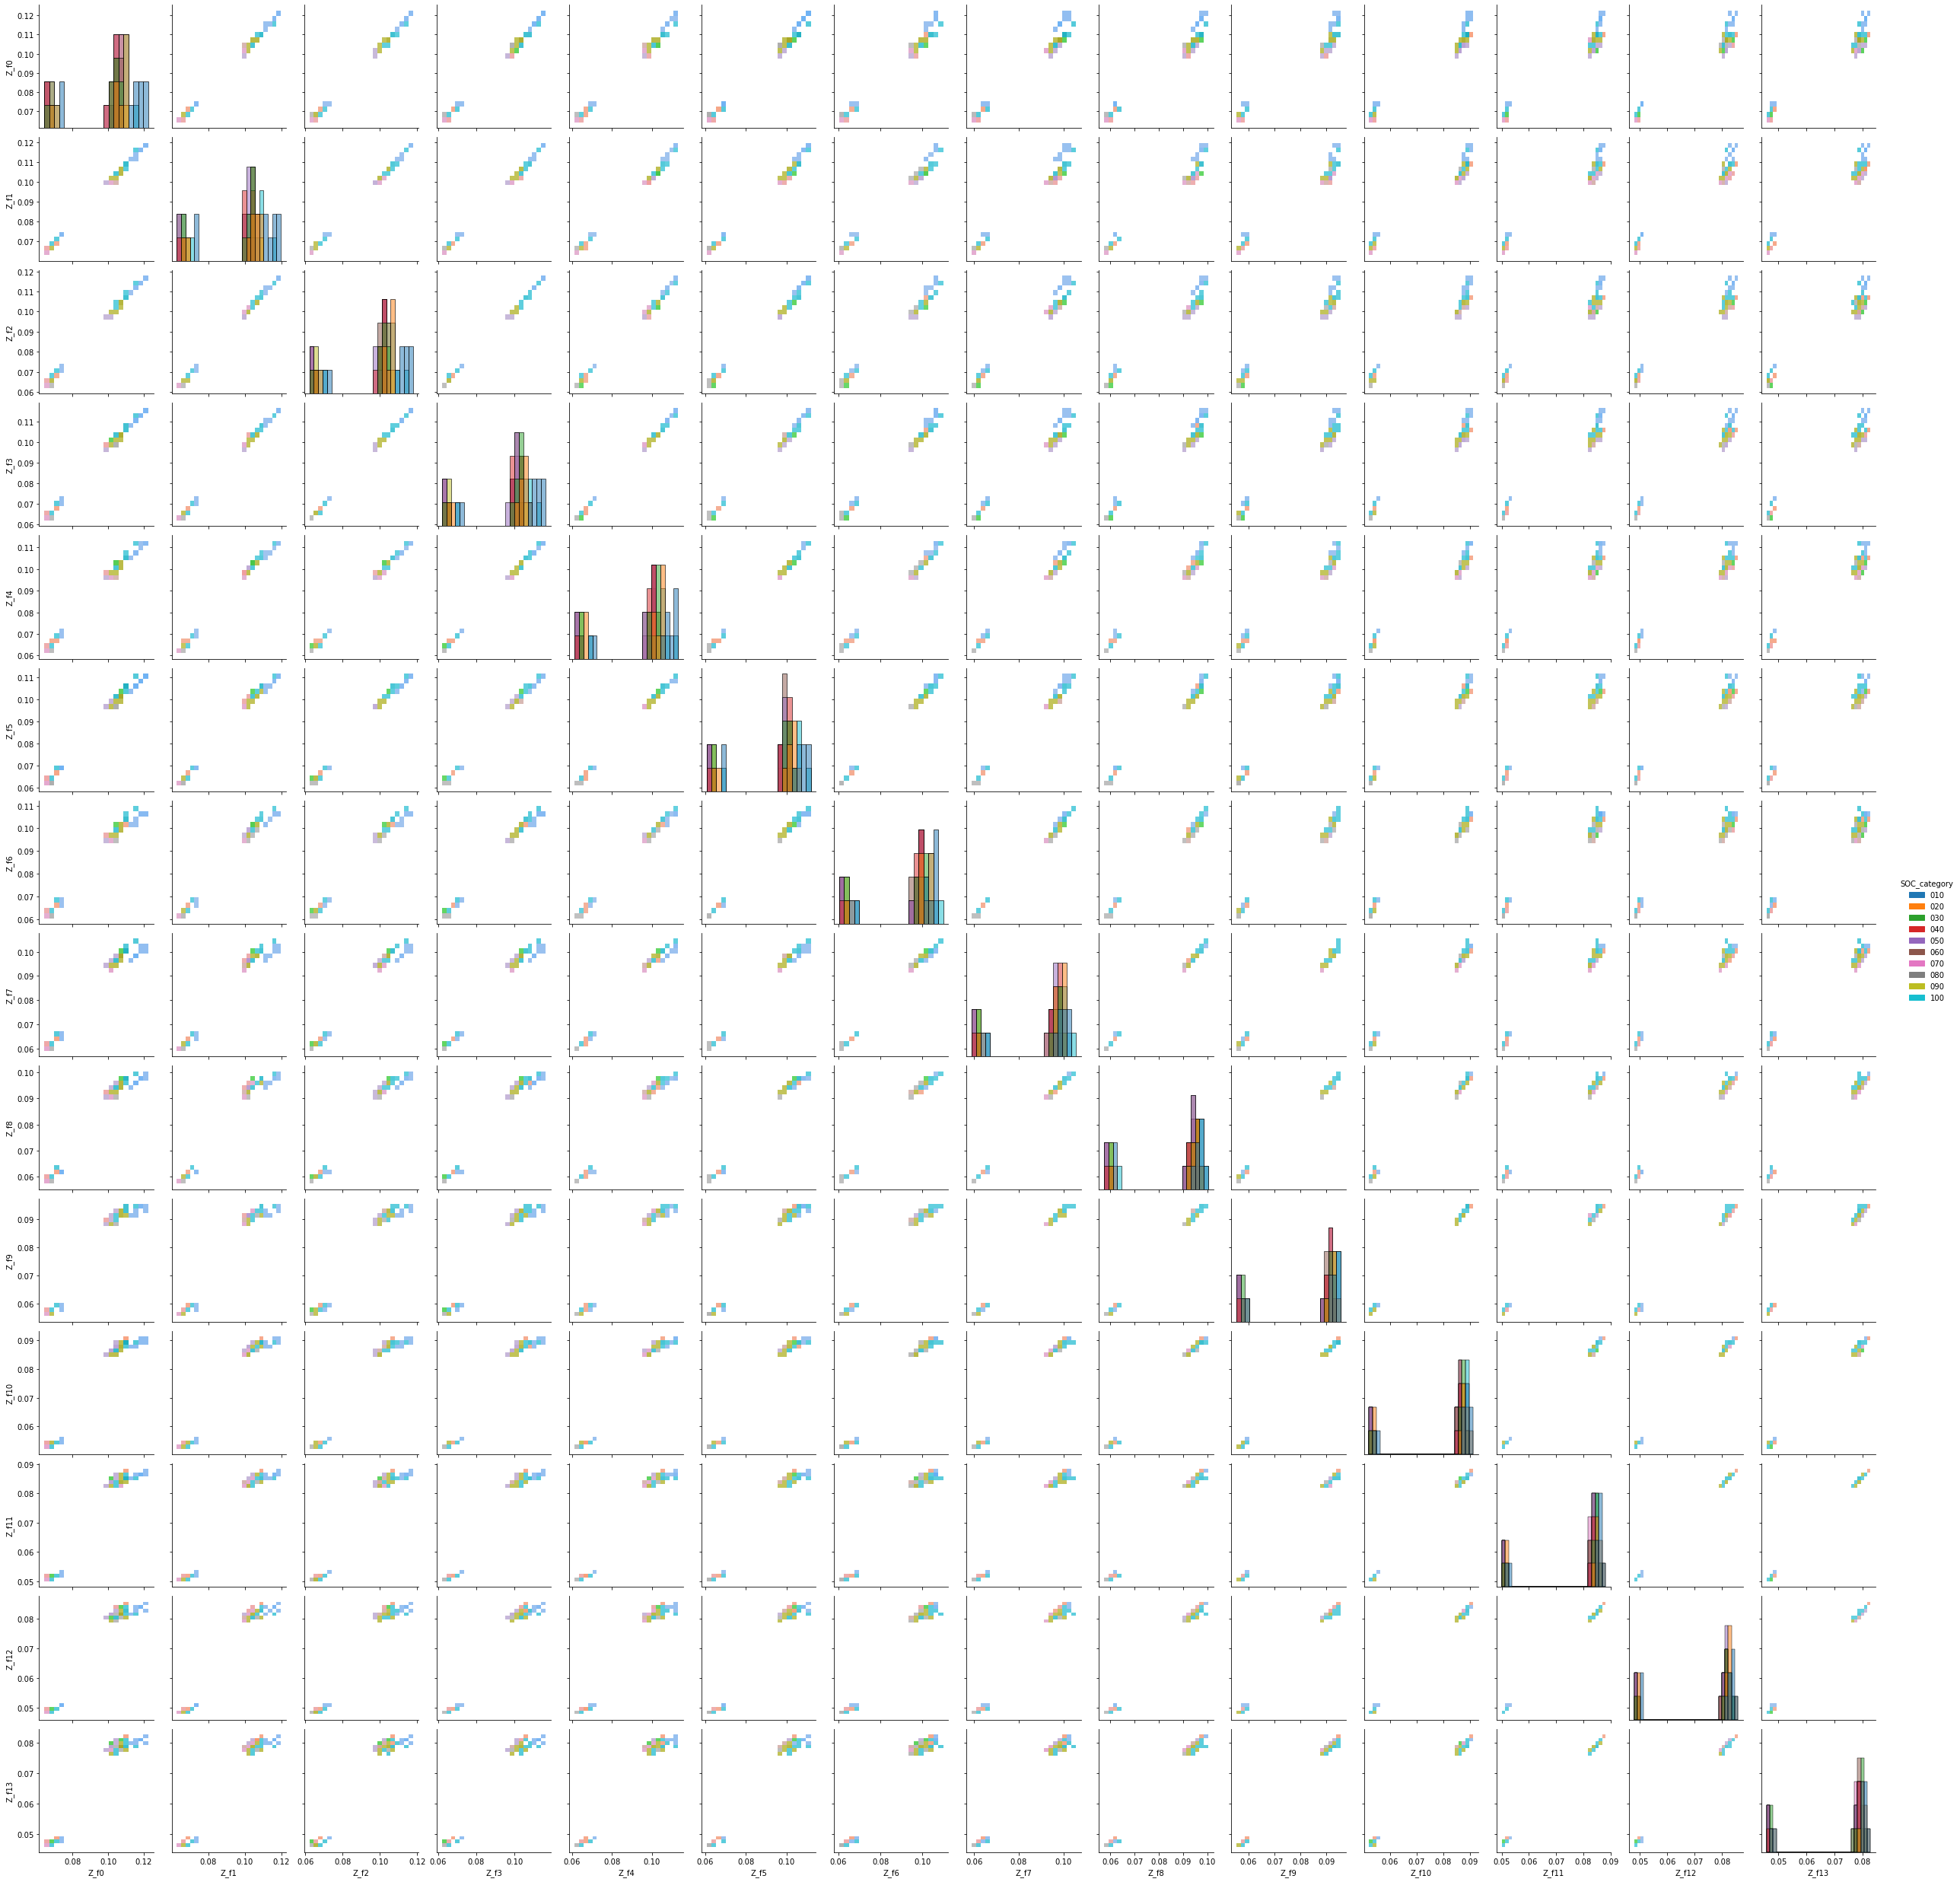

In [14]:
show_pair_plot(df_real,df_real.columns[:-2],'SOC_category',title="Real part of Z_f features")

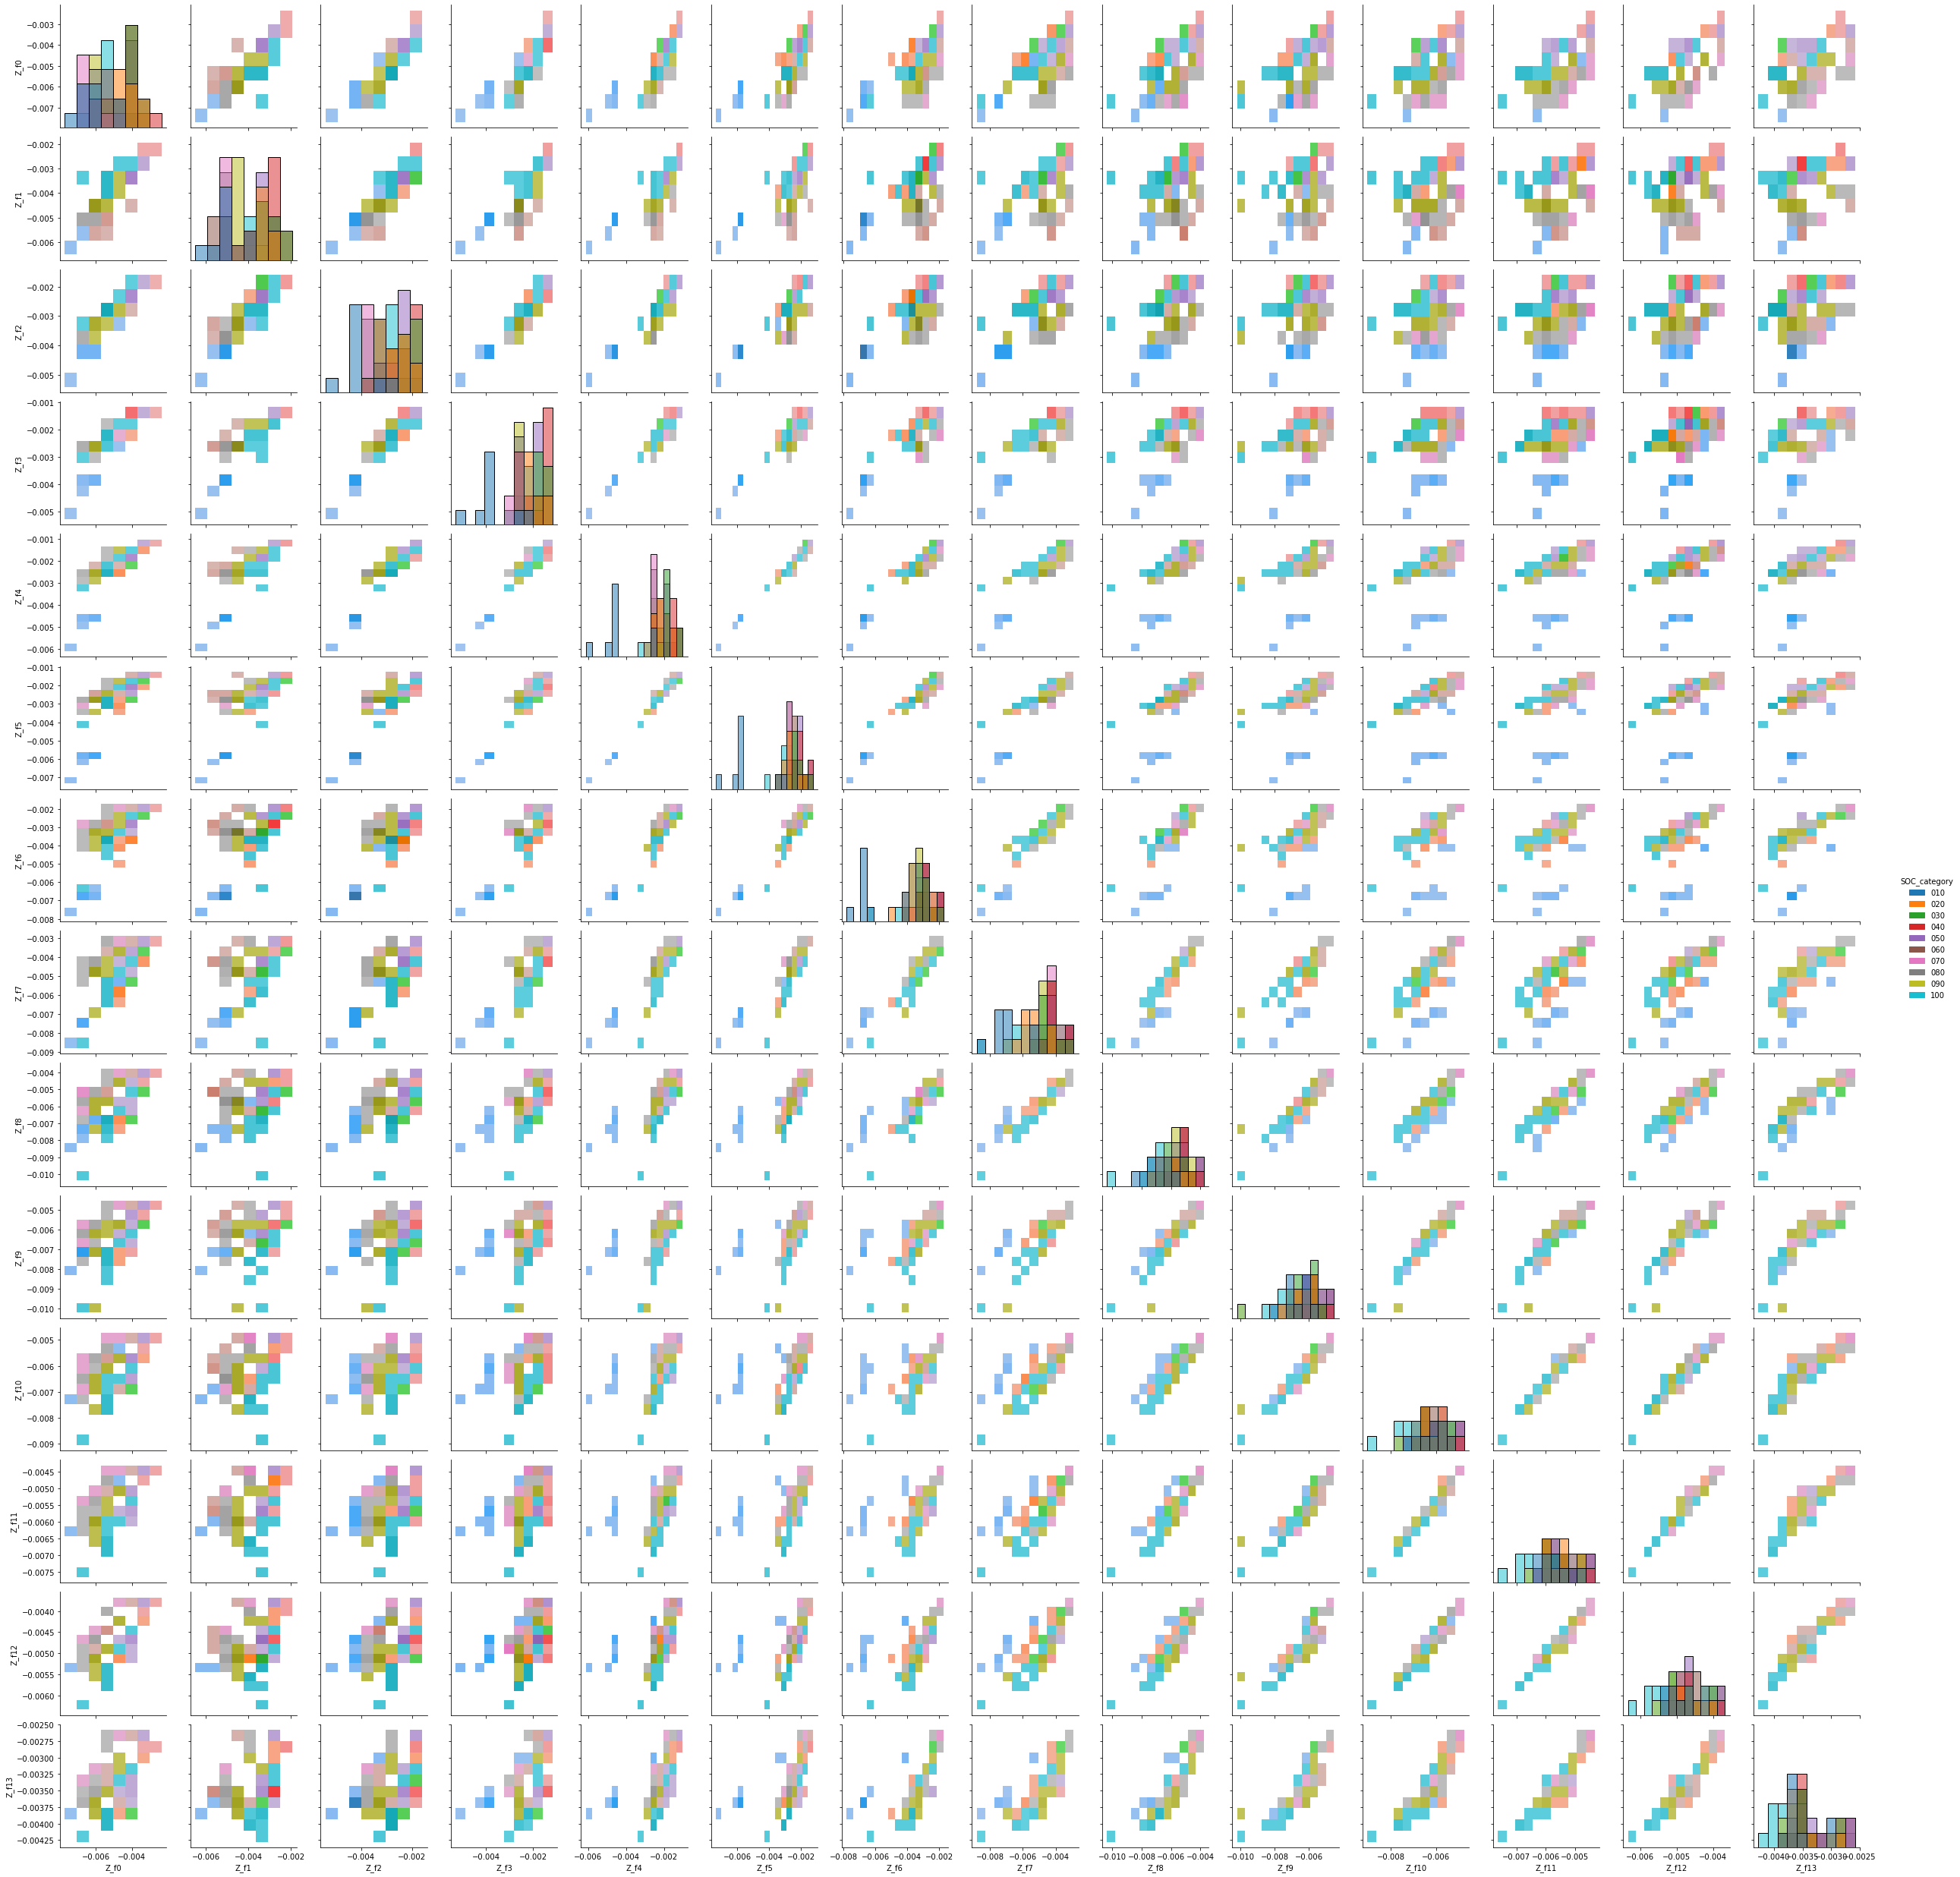

In [16]:
show_pair_plot(df_img,df_img.columns[:-2],'SOC_category',title="Imaginary part of Z_f features")

In [ ]:
def show_coorelation_plot(data):
    #obtain the correlations of each features in dataset
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

show_coorelation_plot(df_real)
show_coorelation_plot(df_img)